### CARDIOVASCULAR DISEASE RELATED INDICATORS 
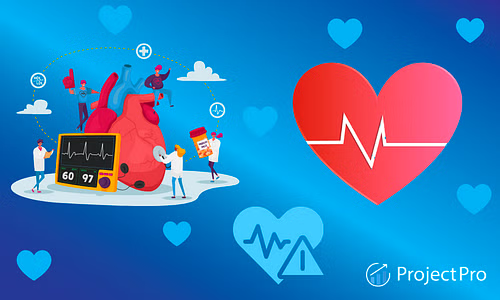

HEART DISEASE PREDICTION

Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

Source
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. .The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Gender: male or female(Nominal) Male=1 Female=0

• Education: Basic=1; Secondary=2; Tertiary=3; Postgraduate=4

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)
• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to read the dataset
df= pd.read_csv('framingham.csv')
df

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  

[4238 rows x 16 columns]

### Data Inspection and Statistics

In [3]:
#to check the first 5 rows
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [4]:
#to check the last last 5 rows
df.tail()

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
#to check the number of rows and columns
df.shape

(4238, 16)

In [7]:
#to check the summary statistics
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [8]:
#to check if any of the columns have duplicates. The columns that will be returned have no duplicates 
df[df.duplicated]

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

### Data Cleaning

In [9]:
df_new = df.rename(columns={'male': 'Gender'})

In [10]:
df_new

Gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
0          1   39        4.0              0         0.0     0.0   
1          0   46        2.0              0         0.0     0.0   
2          1   48        1.0              1        20.0     0.0   
3          0   61        3.0              1        30.0     0.0   
4          0   46        3.0              1        23.0     0.0   
...      ...  ...        ...            ...         ...     ...   
4233       1   50        1.0              1         1.0     0.0   
4234       1   51        3.0              1        43.0     0.0   
4235       0   48        2.0              1        20.0     NaN   
4236       0   44        1.0              1        15.0     0.0   
4237       0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  

[4238 rows x 16 columns]

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [12]:
df_new = df_new.drop(columns=['TenYearCHD'], axis=1)

In [13]:
#converting the datatypes
df_new['Gender']=df_new['Gender'].astype('category')
df_new['education']=df_new['education'].astype('category')
df_new['currentSmoker']=df_new['currentSmoker'].astype('category')
df_new['BPMeds']=df_new['BPMeds'].astype('category')
df_new['prevalentStroke']=df_new['prevalentStroke'].astype('category')
df_new['prevalentHyp']=df_new['prevalentHyp'].astype('category')
df_new['diabetes']=df_new['diabetes'].astype('category')

In [14]:
#checking the datatypes
df_new.dtypes

Gender             category
age                   int64
education          category
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
dtype: object

In [15]:
df_new.shape

(4238, 15)

In [16]:
# numerical columns
numerical_cols = df_new.select_dtypes(include=['float64','int64']).columns
#categorical columns
categorical_cols = df_new.select_dtypes(include=['category']).columns

In [17]:
#Drop rows with missing values in numerical columns
df_new = df_new.dropna(subset=numerical_cols)

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           3800 non-null   category
 1   age              3800 non-null   int64   
 2   education        3707 non-null   category
 3   currentSmoker    3800 non-null   category
 4   cigsPerDay       3800 non-null   float64 
 5   BPMeds           3749 non-null   category
 6   prevalentStroke  3800 non-null   category
 7   prevalentHyp     3800 non-null   category
 8   diabetes         3800 non-null   category
 9   totChol          3800 non-null   float64 
 10  sysBP            3800 non-null   float64 
 11  diaBP            3800 non-null   float64 
 12  BMI              3800 non-null   float64 
 13  heartRate        3800 non-null   float64 
 14  glucose          3800 non-null   float64 
dtypes: category(7), float64(7), int64(1)
memory usage: 294.1 KB


### EDA

#### Distribution of Data

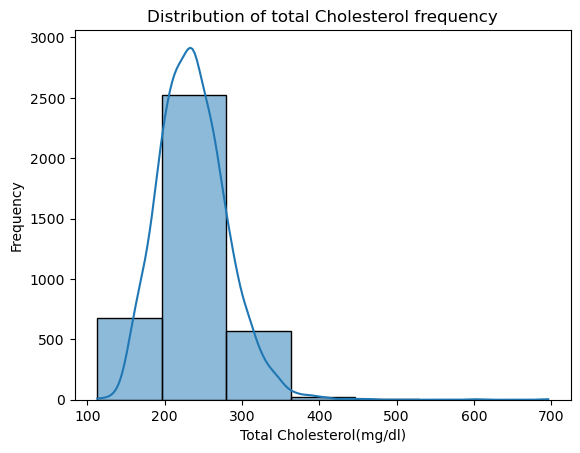

In [19]:
# Create the histogram
sns.histplot(df_new['totChol'], bins=7, kde=True)
plt.title("Distribution of total Cholesterol frequency")
plt.xlabel("Total Cholesterol(mg/dl)")
plt.ylabel("Frequency")
plt.show()

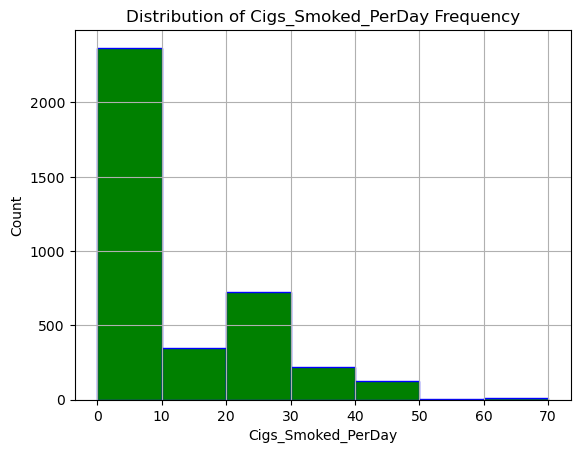

In [20]:
# Create the histogram

plt.hist(df_new['cigsPerDay'], bins=7, edgecolor= 'blue', color= 'green')
plt.title("Distribution of Cigs_Smoked_PerDay Frequency")
plt.xlabel("Cigs_Smoked_PerDay")
plt.ylabel("Count")
plt.grid()
plt.show()

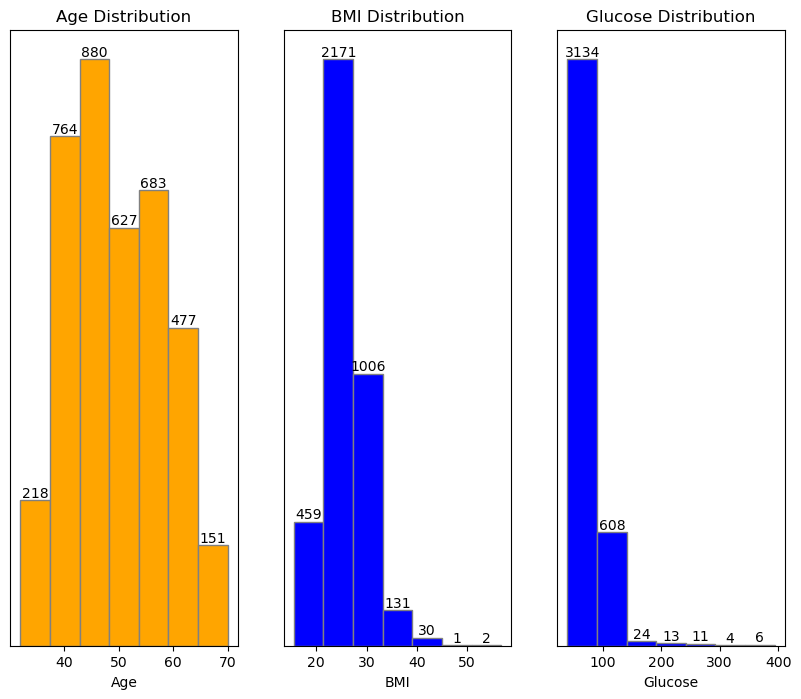

In [21]:
plt.figure(figsize=(10,8))

plt.subplot(1,3,1)  #plt.subplot(row,column,position)
counts,bins,patches=plt.hist(df_new["age"], bins=7, edgecolor= "grey", color="orange")
# Calculate the positions for the labels
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# Add data labels
[patch.set_height(height) for patch, height in zip(patches, counts)]
[plt.text(center, height, f'{int(height)}', ha='center', va='bottom') for center, height in zip(bin_centers, counts)]
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.gca().axes.get_yaxis().set_visible(False)

plt.subplot(1,3,2)  
counts,bins,patches=plt.hist(df_new["BMI"], bins=7, edgecolor= "grey", color="blue")
# Calculate the positions for the labels
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# Add data labels
[patch.set_height(height) for patch, height in zip(patches, counts)]
[plt.text(center, height, f'{int(height)}', ha='center', va='bottom') for center, height in zip(bin_centers, counts)]
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.gca().axes.get_yaxis().set_visible(False)

plt.subplot(1,3,3)  
counts,bins,patches=plt.hist(df_new["glucose"], bins=7, edgecolor= "grey", color="blue")
# Calculate the positions for the labels
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# Add data labels
[patch.set_height(height) for patch, height in zip(patches, counts)]
[plt.text(center, height, f'{int(height)}', ha='center', va='bottom') for center, height in zip(bin_centers, counts)]
plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()

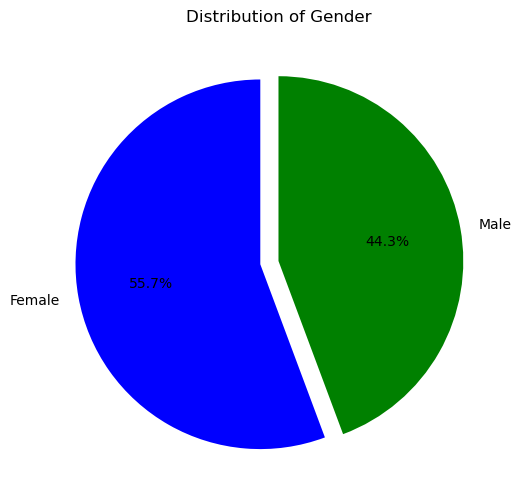

In [22]:
# Create a pie chart
plt.figure(figsize=(6, 6))
# Count the occurrences of each unique value
value_counts = df_new['Gender'].value_counts()
labels = ['Female', 'Male']
value_counts.plot(kind='pie', autopct='%1.1f%%', labels=labels, colors=['blue', 'green'], startangle=90, explode=(0.1, 0))
plt.title('Distribution of Gender')
plt.ylabel('')  # Remove the default y-label
plt.show()

In [23]:
value_counts

Gender
0    2116
1    1684
Name: count, dtype: int64

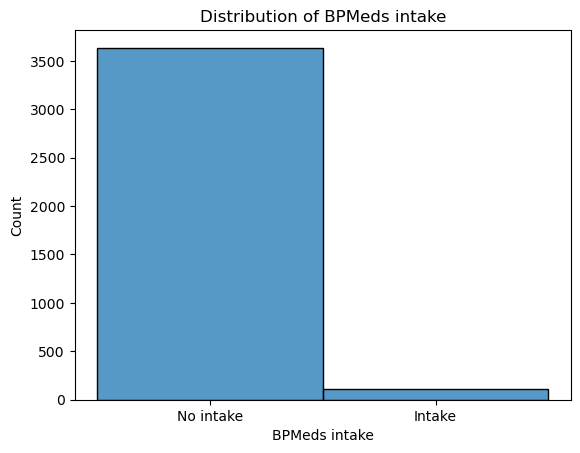

In [24]:
#counting the occurence of people who either tke BPMeds or not using a count plot
sns.histplot(x='BPMeds', data=df_new,palette=['yellow', 'red'])
#creating the title of the plot
plt.title("Distribution of BPMeds intake")
#labeling the x and y axis
plt.xlabel("BPMeds intake")
plt.ylabel("Count")
plt.xticks([0,1], ['No intake', 'Intake'])  # Customizing x-axis labels
plt.show()

In [25]:
#ANALYSING THE RELATIONSHIP BETWEEN BMI AND Gender
#groupby function
df_new.groupby(df_new["Gender"])["BMI"].value_counts().to_frame()

count
Gender BMI         
0      23.48     16
       22.54     14
       22.19     14
       22.91     14
       23.09     11
...             ...
1      19.57      0
       19.61      0
       19.63      0
       19.66      0
       56.80      0

[2622 rows x 1 columns]

In [26]:
# detect columns with outliers
outliers = {}
for col in numerical_cols:
    z_scores = zscore(df_new[col])
    outliers[col] = df_new[abs(z_scores) > 3]
print(outliers.keys())

dict_keys(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])


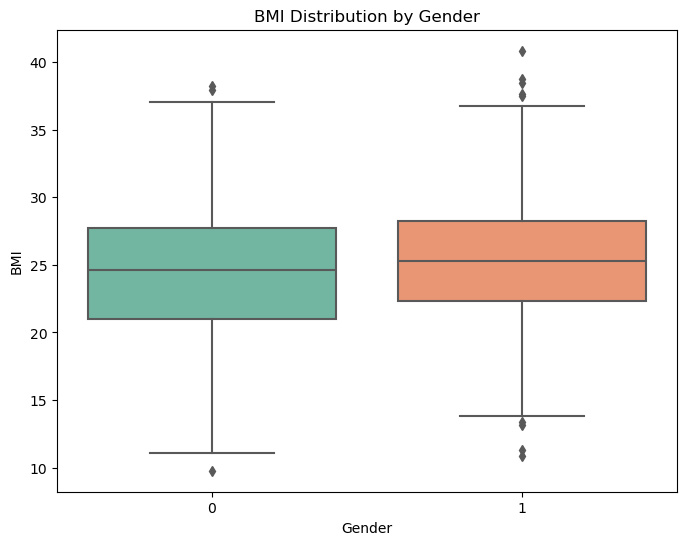

In [27]:
#Boxplot is used to graphically detect outliers
#boxplot of BMI Distribution by Gender
np.random.seed(0)
data = {
    'Gender': np.random.choice([0,1], size=1000),
    'BMI': np.random.normal(loc=25, scale=5, size=1000)}  # Example BMI values

# Convert data to a DataFrame
df_1 = pd.DataFrame(data)

# Plotting with Seaborn - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BMI', data=df_1, palette='Set2')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')

# Show plot
plt.show()

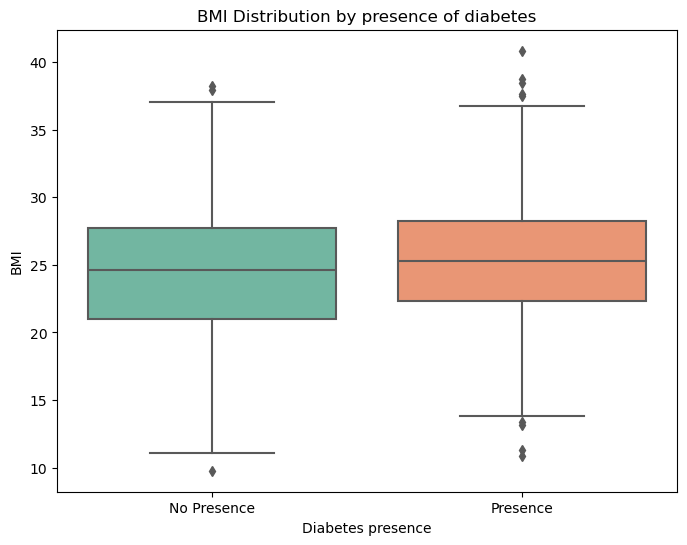

In [28]:
#Using box plot to determine the distribution of BMI by the presence of diabetes
np.random.seed(0)
data = {
    'diabetes': np.random.choice(['0', '1'], size=1000),
    'BMI': np.random.normal(loc=25, scale=5, size=1000)}  # Example BMI values

# Convert data to a DataFrame
df = pd.DataFrame(data)

#counting the occurence of people who either tke BPMeds or not
Diab_Presence_counts= df_new['diabetes'].value_counts()

# Plotting with Seaborn - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='BMI', data=df, palette='Set2')
plt.title('BMI Distribution by presence of diabetes')
plt.xlabel('Diabetes presence')
plt.xticks(Diab_Presence_counts.index, ['No Presence', 'Presence'])  # Customizing x-axis labels
plt.ylabel('BMI')

# Show plot
plt.show()

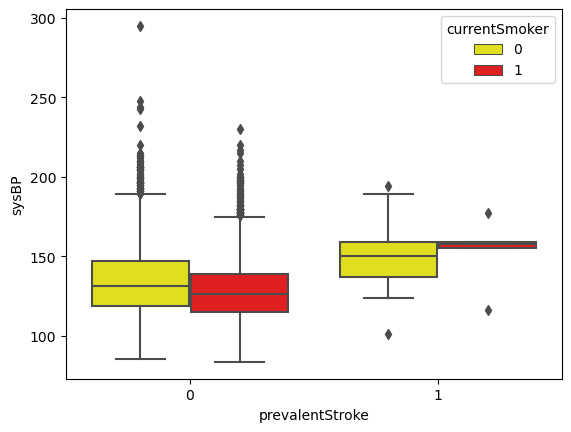

In [29]:
# Boxplot
sns.boxplot(x='prevalentStroke', y='sysBP',hue='currentSmoker', data=df_new,palette=['yellow', 'red'])
plt.show()


In [30]:
df_new_ = df_new.select_dtypes(exclude=['category'])

# Correlation matrix
corr_matrix = df_new_.corr()
print("\nCorrelation Matrix:\n")
corr_matrix


Correlation Matrix:



age  cigsPerDay   totChol     sysBP     diaBP       BMI  \
age         1.000000   -0.191771  0.263405  0.390521  0.204356  0.136065   
cigsPerDay -0.191771    1.000000 -0.031026 -0.094771 -0.059069 -0.092478   
totChol     0.263405   -0.031026  1.000000  0.215955  0.168777  0.114116   
sysBP       0.390521   -0.094771  0.215955  1.000000  0.785156  0.327806   
diaBP       0.204356   -0.059069  0.168777  0.785156  1.000000  0.380782   
BMI         0.136065   -0.092478  0.114116  0.327806  0.380782  1.000000   
heartRate  -0.006859    0.068690  0.094134  0.182571  0.177342  0.071677   
glucose     0.119013   -0.057769  0.046546  0.133040  0.060305  0.088816   

            heartRate   glucose  
age         -0.006859  0.119013  
cigsPerDay   0.068690 -0.057769  
totChol      0.094134  0.046546  
sysBP        0.182571  0.133040  
diaBP        0.177342  0.060305  
BMI          0.071677  0.088816  
heartRate    1.000000  0.097179  
glucose      0.097179  1.000000

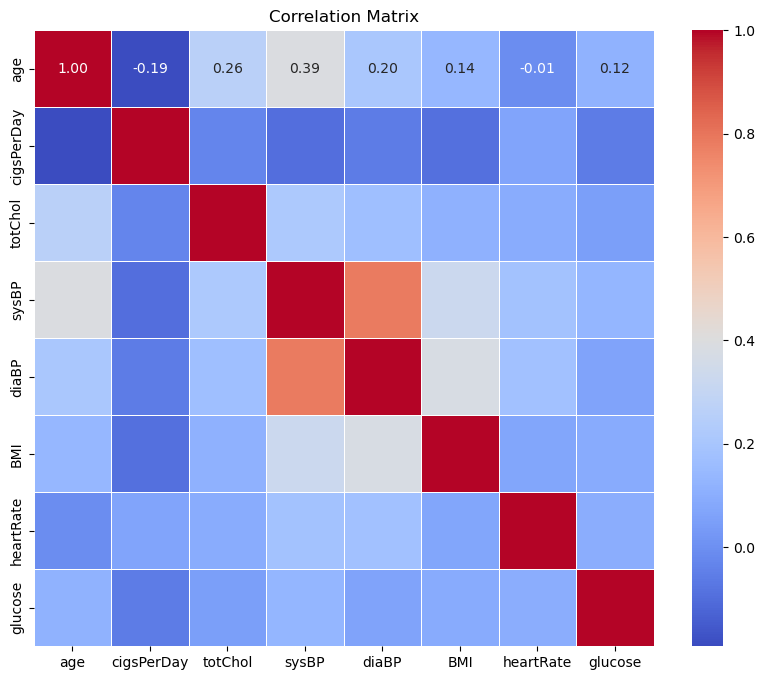

In [31]:
# Using the correlation matrix to find the relationship between the variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### Scaling data in Python ensures that all features contribute equally to the analysis by bringing them to a comparable range. This is crucial for machine learning algorithms (like k-means clustering, SVM, and neural networks) that are sensitive to the magnitude of the data. Without scaling, features with larger ranges can dominate the model, leading to biased results. 

In [32]:
#initialize standard scaler
scaler = StandardScaler()

In [33]:
scaled_numerical = scaler.fit_transform(df_new[numerical_cols])

In [34]:
scaled_numerical

array([[-1.23809962, -0.75413529, -0.93892699, ...,  0.28610339,
         0.3598338 , -0.20545674],
       [-0.42265282, -0.75413529,  0.29088996, ...,  0.71876413,
         1.61768528, -0.24747244],
       [-0.18966802,  0.92275057,  0.17908841, ..., -0.11459946,
        -0.05945003, -0.4995666 ],
       ...,
       [ 0.15980918,  2.85116931, -0.67060329, ..., -1.49862219,
        -0.89801769, -0.58359799],
       [-0.18966802,  0.92275057,  0.24616934, ..., -0.93567156,
         0.69526086,  0.1726845 ],
       [ 0.27630158, -0.75413529,  0.71573581, ..., -1.06596144,
         0.3598338 ,  1.05501407]])

In [35]:
scaled_numerical_df = pd.DataFrame(scaled_numerical,columns= numerical_cols)

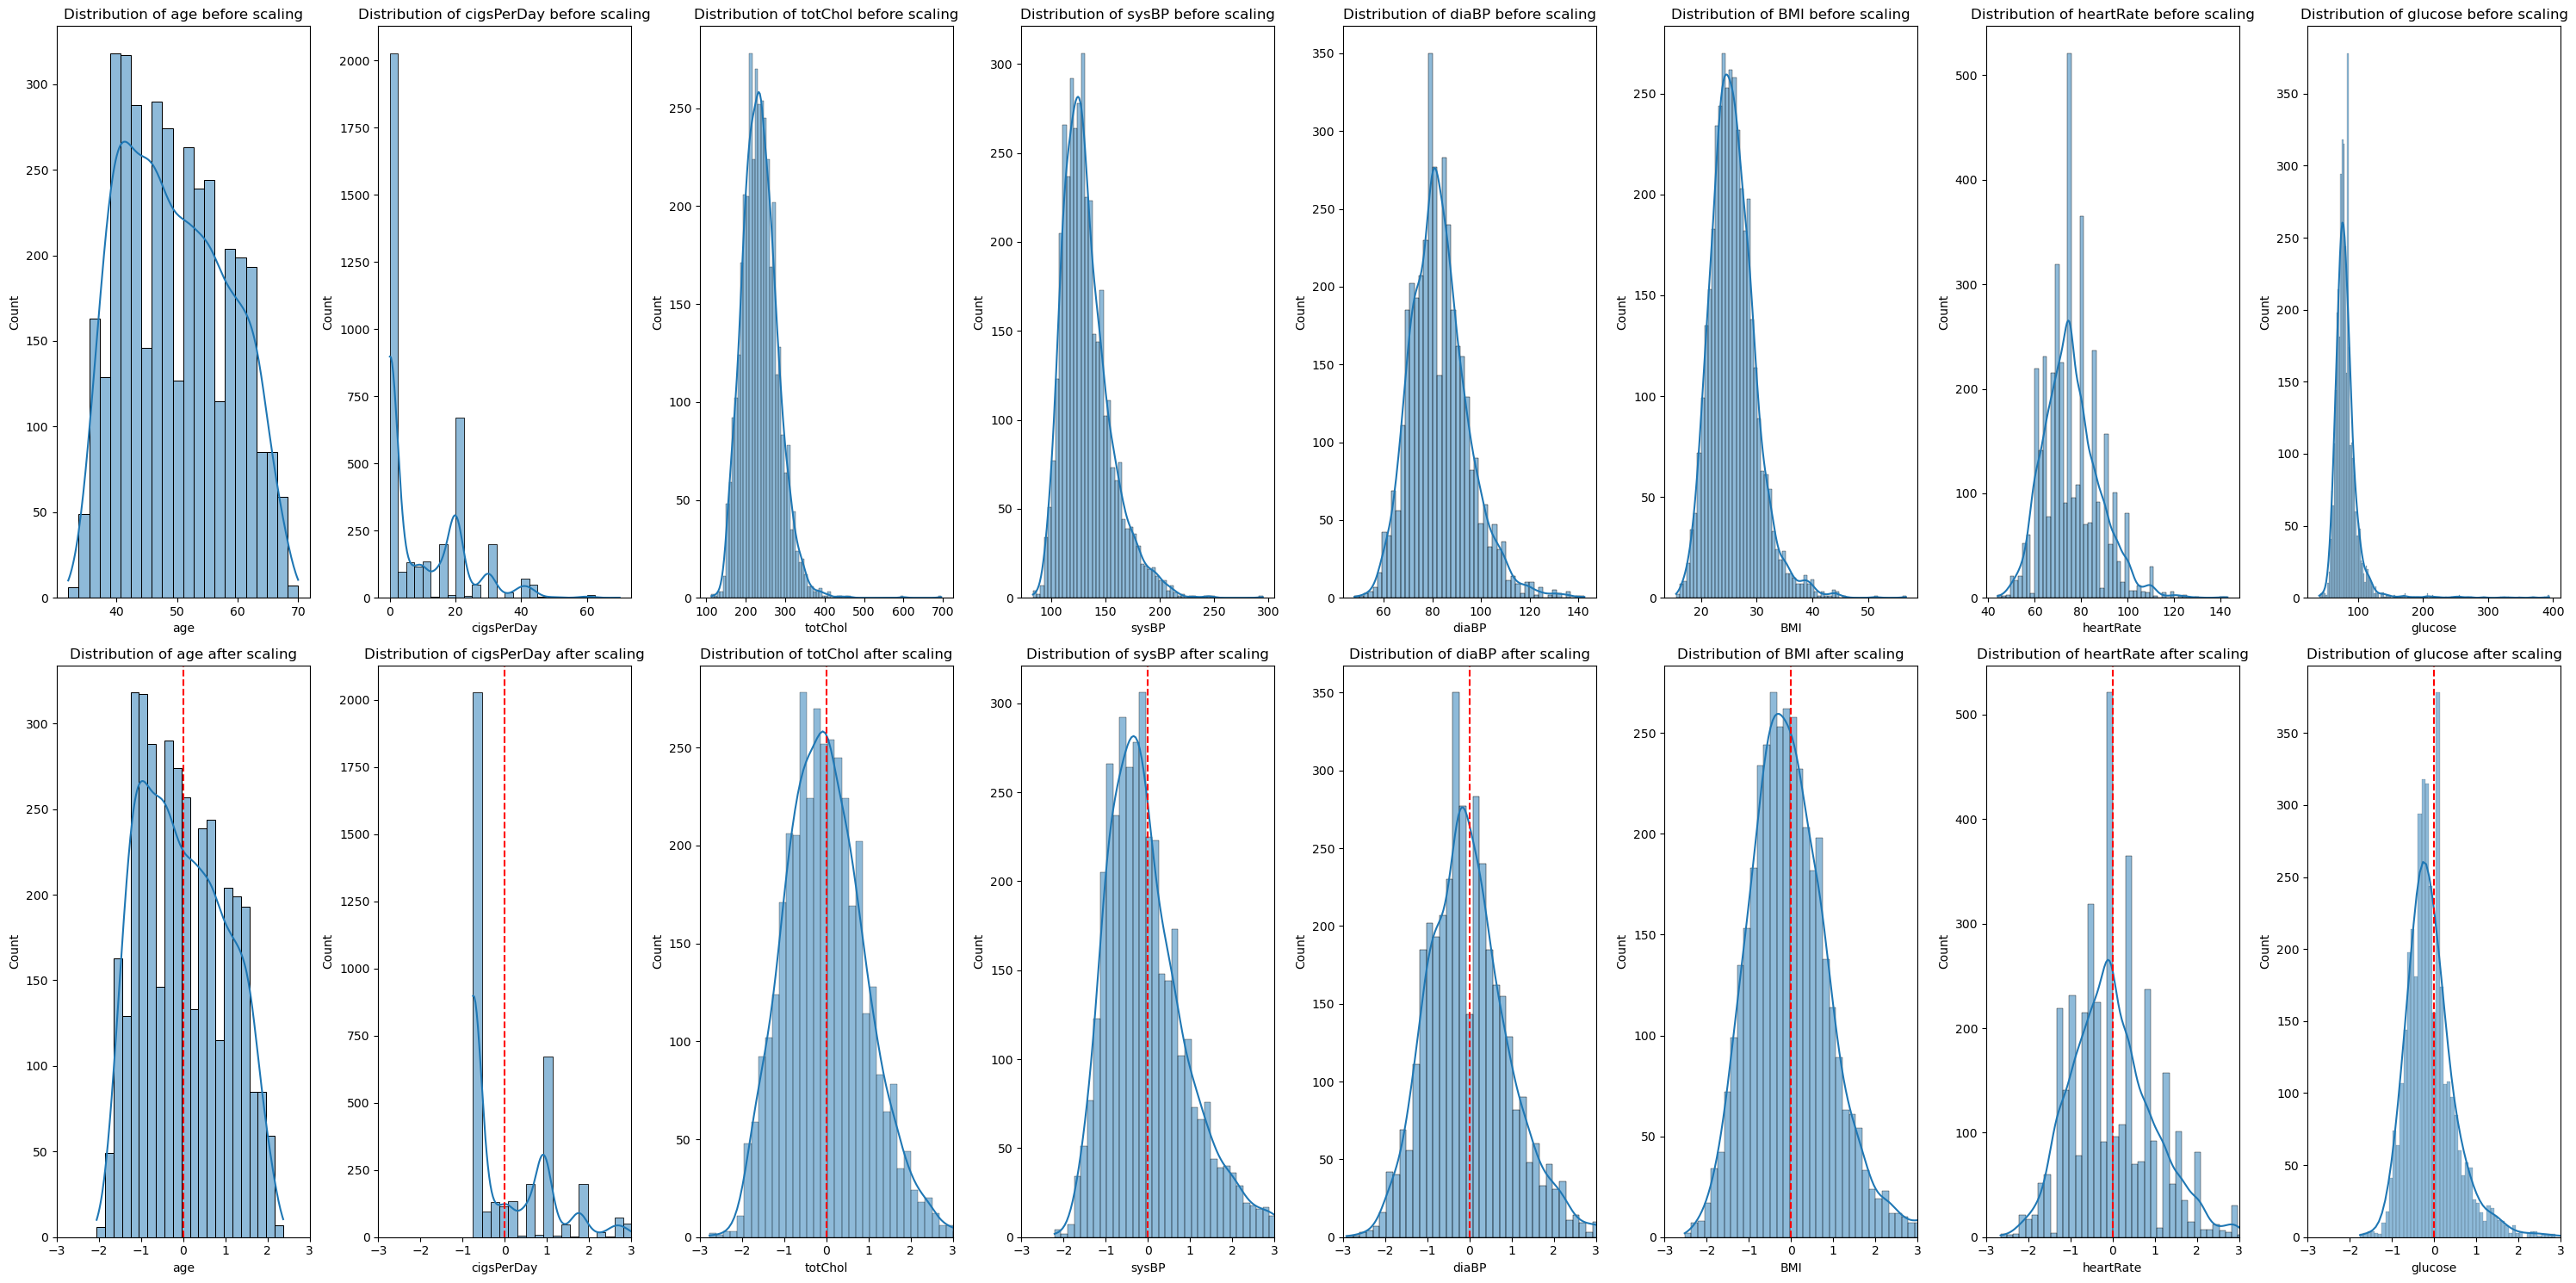

In [36]:
#visualize the data
fig,axes = plt.subplots(nrows=2,ncols=len(numerical_cols),figsize=(30,15))
#plot numerical features before scaling
for idx,col in enumerate(numerical_cols):
    sns.histplot(df_new[col],ax=axes[0,idx],kde=True)
    axes[0,idx].set_title(f'Distribution of {col} before scaling')
['age','class','fare']
#plot numerical features after scaling
for idx,col in enumerate(numerical_cols):
    sns.histplot(scaled_numerical_df[col],ax=axes[1,idx],kde=True)
    axes[1,idx].axvline(0,color='r',linestyle='--')
    axes[1,idx].set_title(f'Distribution of {col} after scaling')
    axes[1,idx].set_xlim(-3,3)

plt.tight_layout()
plt.show()

In [37]:
#handle missing values for categorical data
for col in categorical_cols:
    df_new[col] = df_new[col].fillna(df_new[col].mode()[0])




In [38]:
#encode the education Categorical variables using LabelEncoder
education = df_new['education']
label_encoder = LabelEncoder()
education_encoded = label_encoder.fit_transform(education)

In [39]:
#check the shape of the encoded categorical column
education_encoded.shape

(3800,)

In [40]:
#reshaping the encoded categorical feature to 2D
education_encoded= education_encoded.reshape(-1, 1)

In [41]:
#view the shape of the encoded categorical feature
education_encoded.shape

(3800, 1)

In [42]:
df_new['education']=education_encoded

In [43]:
df_new['education']=df_new['education'].astype('category')

In [44]:
#check the shape of the scaled numerical column
scaled_numerical.shape

(3800, 8)

In [45]:
#encode the education Categorical variables using LabelEncoder
BPMeds = df_new['BPMeds']
label_encoder = LabelEncoder()
BPMeds_encoded = label_encoder.fit_transform(BPMeds)

In [46]:
#check the shape of the encoded categorical column
BPMeds_encoded.shape

(3800,)

In [47]:
#reshaping the encoded categorical feature to 2D
BPMeds_encoded= BPMeds_encoded.reshape(-1, 1)

In [48]:
#view the shape of the encoded categorical feature
BPMeds_encoded.shape

(3800, 1)

In [49]:
Gender=df_new['Gender']
diabetes=df_new['diabetes']
currentSmoker=df_new['currentSmoker']
prevalentStroke=df_new['prevalentStroke']
prevalentHyp=df_new['prevalentHyp']

In [50]:
#check the shape of the already encoded categorical columns
print(Gender.shape)
print(diabetes.shape)
print(currentSmoker.shape)
print(prevalentStroke.shape)
print(prevalentHyp.shape)

(3800,)
(3800,)
(3800,)
(3800,)
(3800,)


In [51]:
#encode the diabetes Categorical variables using LabelEncoder
diabetes = df_new['diabetes']
label_encoder = LabelEncoder()
diabetes_encoded = label_encoder.fit_transform(diabetes)

In [52]:
diabetes_encoded=diabetes_encoded.reshape(-1,1)

In [53]:
diabetes_encoded.shape

(3800, 1)

In [54]:
#encode the Gender Categorical variables using LabelEncoder
gender = df_new['Gender']
label_encoder = LabelEncoder()
gender_encoded = label_encoder.fit_transform(gender)

In [55]:
gender_encoded=gender_encoded.reshape(-1,1)

In [56]:
gender_encoded.shape

(3800, 1)

In [57]:
#encode the currentSmoker Categorical variables using LabelEncoder
currentSmoker = df_new['currentSmoker']
label_encoder = LabelEncoder()
currentSmoker_encoded = label_encoder.fit_transform(currentSmoker)

In [58]:
currentSmoker_encoded=currentSmoker_encoded.reshape(-1,1)

In [59]:
currentSmoker_encoded.shape

(3800, 1)

In [60]:
#encode the prevalentStroke Categorical variables using LabelEncoder
prevalentStroke = df_new['prevalentStroke']
label_encoder = LabelEncoder()
prevalentStroke_encoded = label_encoder.fit_transform(prevalentStroke)

In [61]:
prevalentStroke_encoded=prevalentStroke_encoded.reshape(-1,1)

In [62]:
prevalentStroke_encoded.shape

(3800, 1)

In [63]:
#encode the prevalentHyp Categorical variables using LabelEncoder
prevalentHyp = df_new['prevalentHyp']
label_encoder = LabelEncoder()
prevalentHyp_encoded = label_encoder.fit_transform(prevalentHyp)

In [64]:
prevalentHyp_encoded=prevalentHyp_encoded.reshape(-1,1)

In [65]:
prevalentHyp_encoded.shape

(3800, 1)

In [66]:
df_new['prevalentHyp']=prevalentHyp_encoded
df_new['prevalentStroke']=prevalentStroke_encoded
df_new['Gender']=gender_encoded
df_new['diabetes']=diabetes_encoded
df_new['currentSmoker']=currentSmoker_encoded

In [67]:
df_new.head()

Gender  age education  currentSmoker  cigsPerDay BPMeds  prevalentStroke  \
0       1   39         3              0         0.0    0.0                0   
1       0   46         1              0         0.0    0.0                0   
2       1   48         0              1        20.0    0.0                0   
3       0   61         2              1        30.0    0.0                0   
4       0   46         2              1        23.0    0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0  
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0  
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0  
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0

In [68]:
df_new.dtypes

Gender                int64
age                   int64
education          category
currentSmoker         int64
cigsPerDay          float64
BPMeds             category
prevalentStroke       int64
prevalentHyp          int64
diabetes              int64
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
dtype: object

In [94]:
#Concatenating the scaled numerical features and the encoded categorical feature
numerical_scaled_categorical_encoded = np.concatenate((scaled_numerical,prevalentHyp_encoded,prevalentStroke_encoded,gender_encoded,currentSmoker_encoded, diabetes_encoded), axis=1)

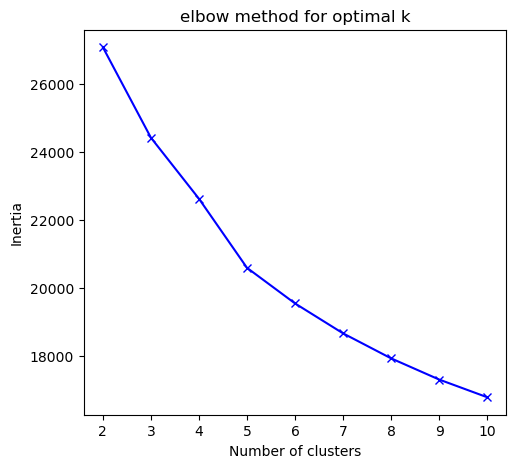

In [95]:
#plotting the elbow method
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K,inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('elbow method for optimal k')
plt.show()

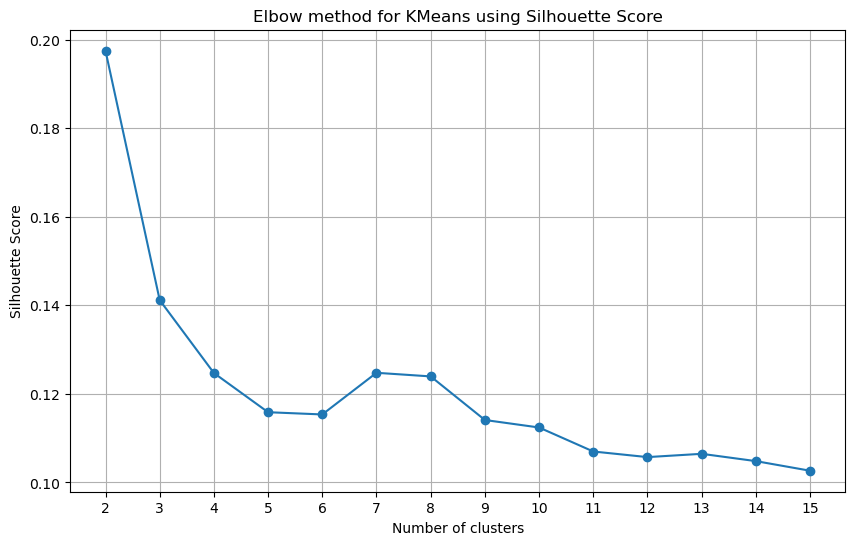

Optimal number of clusters: 2
KMeans Silhouette score: 0.19753600428777376


In [96]:
# Silhouette Score Calculation
silhouette_scores = []
cluster_range = range(2, 16)  # Use range from 2 to 15

for nr_c in cluster_range:  # Iterate over cluster_range
    kmeans = KMeans(n_clusters=nr_c, random_state=42, n_init='auto')
    kmeans_labels = kmeans.fit_predict(numerical_scaled_categorical_encoded)
    silhouette_scores.append(silhouette_score(numerical_scaled_categorical_encoded, kmeans_labels))

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')  # Plot all silhouette scores
plt.title('Elbow method for KMeans using Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 16, step=1))  # Adjust ticks for better visualization
plt.grid(True)
plt.show()

# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 as we started from 2 clusters
print("Optimal number of clusters:", optimal_clusters)

# KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(numerical_scaled_categorical_encoded)

# Silhouette score for KMeans
kmeans_score = silhouette_score(numerical_scaled_categorical_encoded, kmeans_labels)
print("KMeans Silhouette score:", kmeans_score)


In [97]:
#determine the best number of clusters using the silhouette score
optimal_k=K[np.argmax(silhouette_score)]

#fitting the final KMeans model with the optimal number of clusters
kmeans_optimal=KMeans(n_clusters=optimal_k,random_state=42)
kmeans_optimal.fit(numerical_scaled_categorical_encoded)

#Add the cluster labels to the original  data
data['Cluster']=kmeans_optimal.labels_

#Evaluate the final clustering
final_inertia=kmeans_optimal.inertia_
final_silhouette_score=silhouette_score(numerical_scaled_categorical_encoded, kmeans_optimal.labels_)

print(f"Final Inertia: {final_inertia}")
print(f"Final Silhouette Score: {final_silhouette_score}")


Final Inertia: 27070.894163798006
Final Silhouette Score: 0.19742289258552356


#### For Silhouette Score index, values above 0.5 are better with the highest been preferred. Values between 0.25 - 5 are fair and below 0.25 are bad

In [100]:
#Using PCA for dimensionality reduction
#applying PCA to keep the top 2 main components
pca=PCA(n_components=2)
pca_data=pca.fit_transform(numerical_scaled_categorical_encoded)

#Apply KMEans to the rediced data
inertia_pca=[]
silhouette_scores_pca=[]
davies_bouldin_scores_pca=[]
calinski_harabasz_scores_pca=[]

for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(pca_data)
    inertia_pca.append(kmeans.inertia_)
    silhouette_scores_pca.append(silhouette_score(pca_data,kmeans.labels_))
    silhouette_scores.append(silhouette_score(numerical_scaled_categorical_encoded, kmeans.labels_))

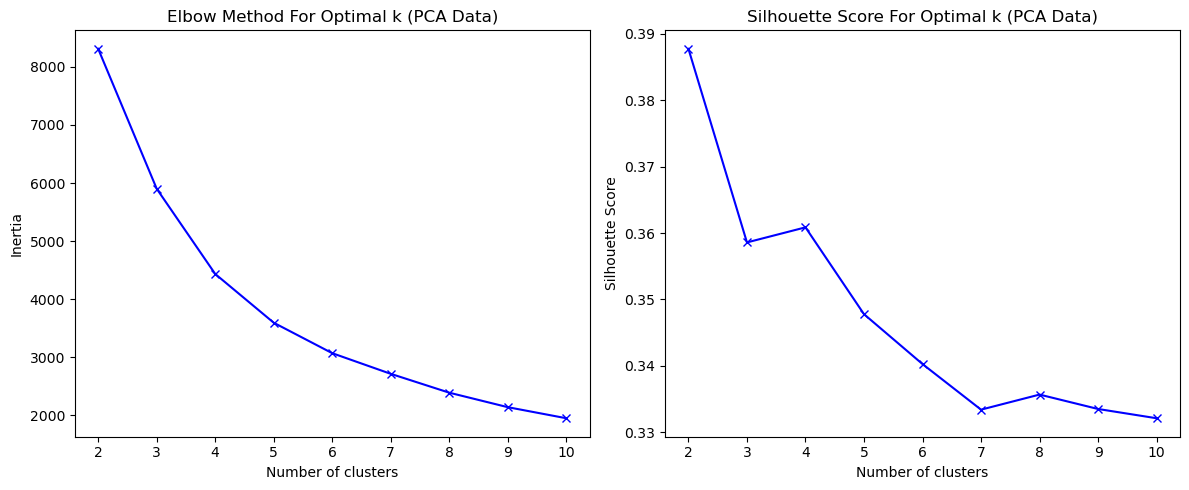

In [101]:
# Plot the elbow method for PCA data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia_pca, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k (PCA Data)')

# Plot the silhouette scores for PCA data
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores_pca, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k (PCA Data)')

plt.tight_layout()
plt.show()


In [102]:
# Determine the best number of clusters using the silhouette score for PCA data
optimal_k_pca = K[np.argmax(silhouette_scores_pca)]
print(f"The optimal number of clusters based on silhouette score for PCA data is: {optimal_k_pca}")

# Fit the final KMeans model with the optimal number of clusters on PCA data
kmeans_optimal_pca = KMeans(n_clusters=optimal_k_pca, random_state=42)
kmeans_optimal_pca.fit(pca_data)

# Add the cluster labels to the original data
df_new['Cluster_PCA'] = kmeans_optimal_pca.labels_

# Evaluate the final clustering for PCA data
final_inertia_pca = kmeans_optimal_pca.inertia_
final_silhouette_score_pca = silhouette_score(pca_data, kmeans_optimal_pca.labels_)

print(f"Final Inertia (PCA): {final_inertia_pca}")
print(f"Final Silhouette Score (PCA): {final_silhouette_score_pca}")

The optimal number of clusters based on silhouette score for PCA data is: 2
Final Inertia (PCA): 8309.111905816477
Final Silhouette Score (PCA): 0.3877235080667909


#### Analysis Section

In [108]:
# Add cluster labels to the original data
df_new['Cluster'] = kmeans_labels

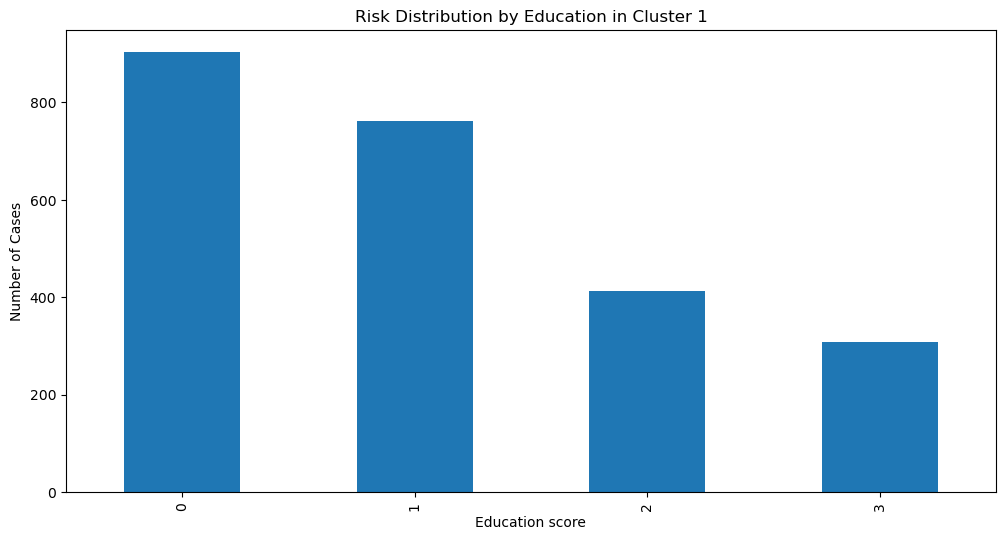

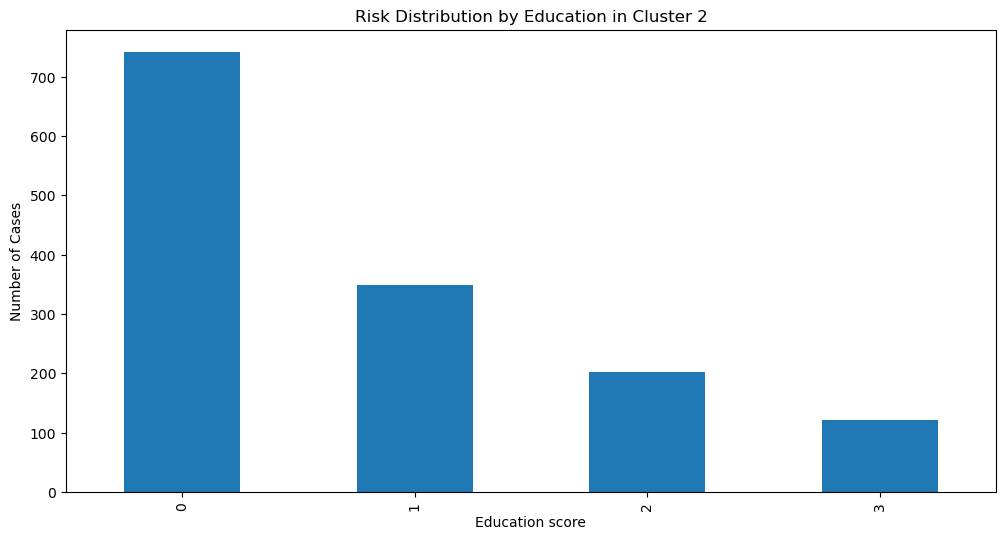

In [109]:
# risk distribution by education within each cluster(education)
for cluster in range(optimal_k_pca):
    cluster_data = df_new[df_new['Cluster'] == cluster]
    education_counts = cluster_data['education'].value_counts()
    plt.figure(figsize=(12, 6))
    education_counts.plot(kind='bar')
    plt.title(f'Risk Distribution by Education in Cluster {cluster + 1}')
    plt.xlabel('Education score')
    plt.ylabel('Number of Cases')
    plt.show()

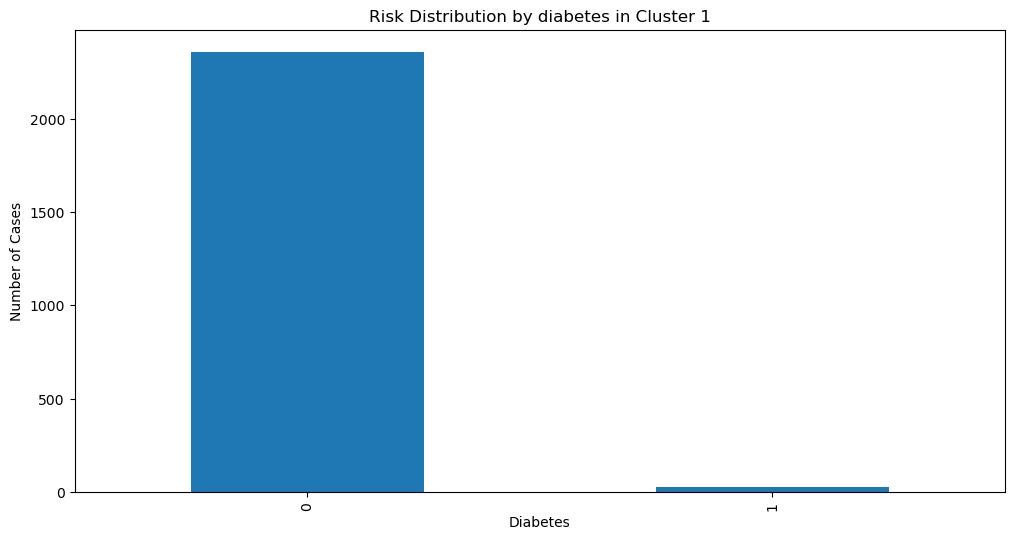

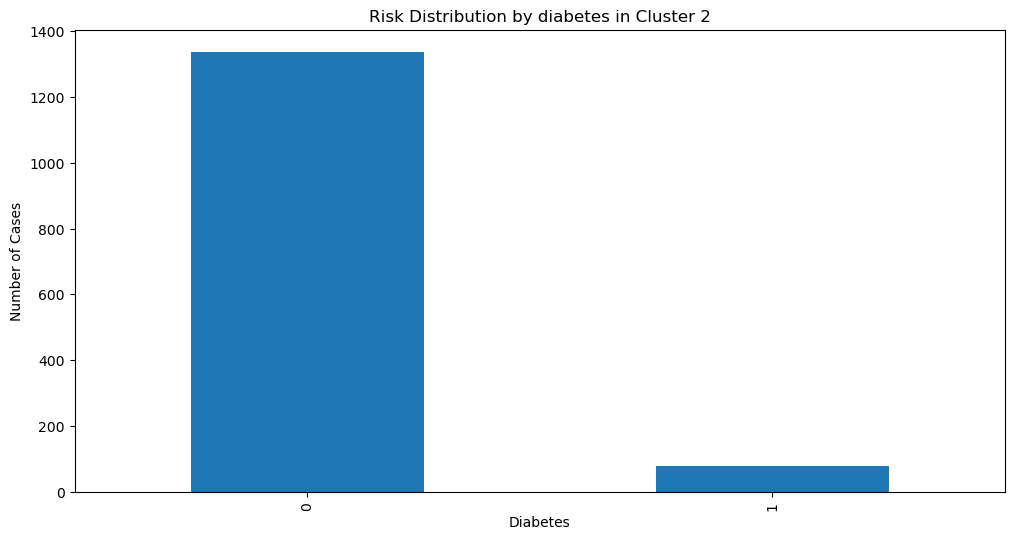

In [111]:
# risk distribution by diabetes within each cluster(education)
for cluster in range(optimal_k_pca):
    cluster_data = df_new[df_new['Cluster'] == cluster]
    diabetes_counts = cluster_data['diabetes'].value_counts()
    plt.figure(figsize=(12, 6))
    diabetes_counts.plot(kind='bar')
    plt.title(f'Risk Distribution by diabetes in Cluster {cluster + 1}')
    plt.xlabel('Diabetes')
    plt.ylabel('Number of Cases')
    plt.show()

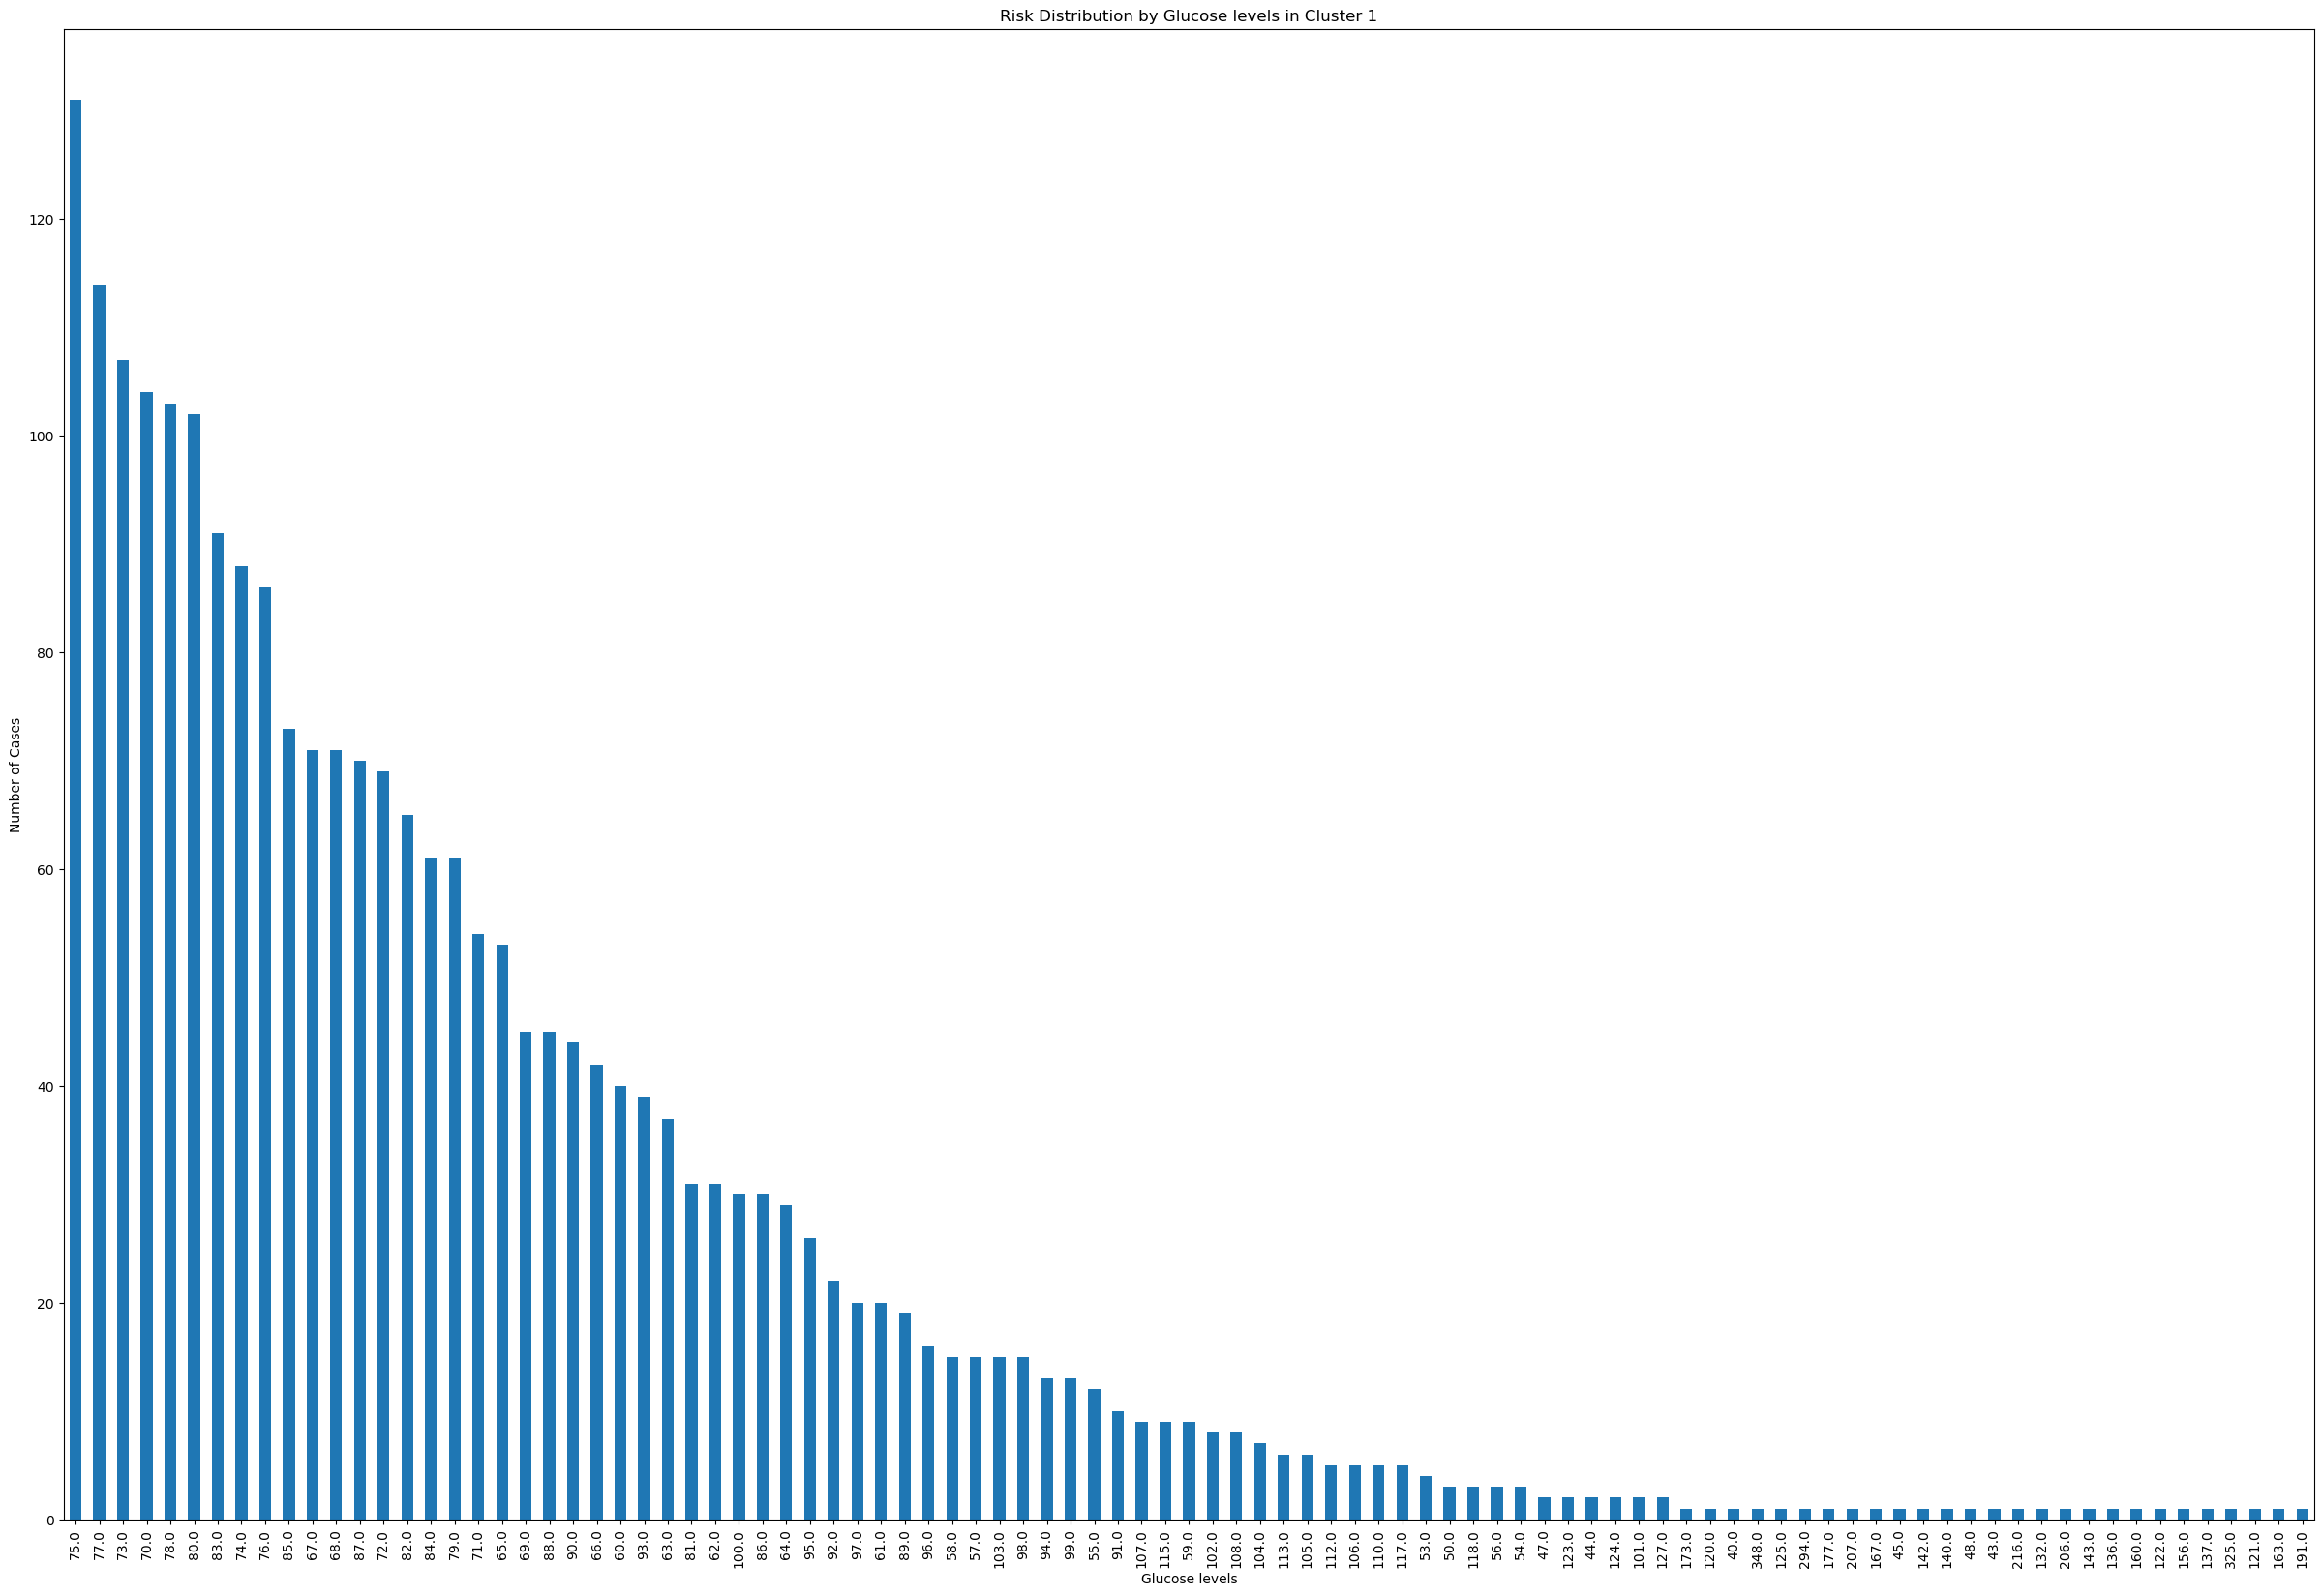

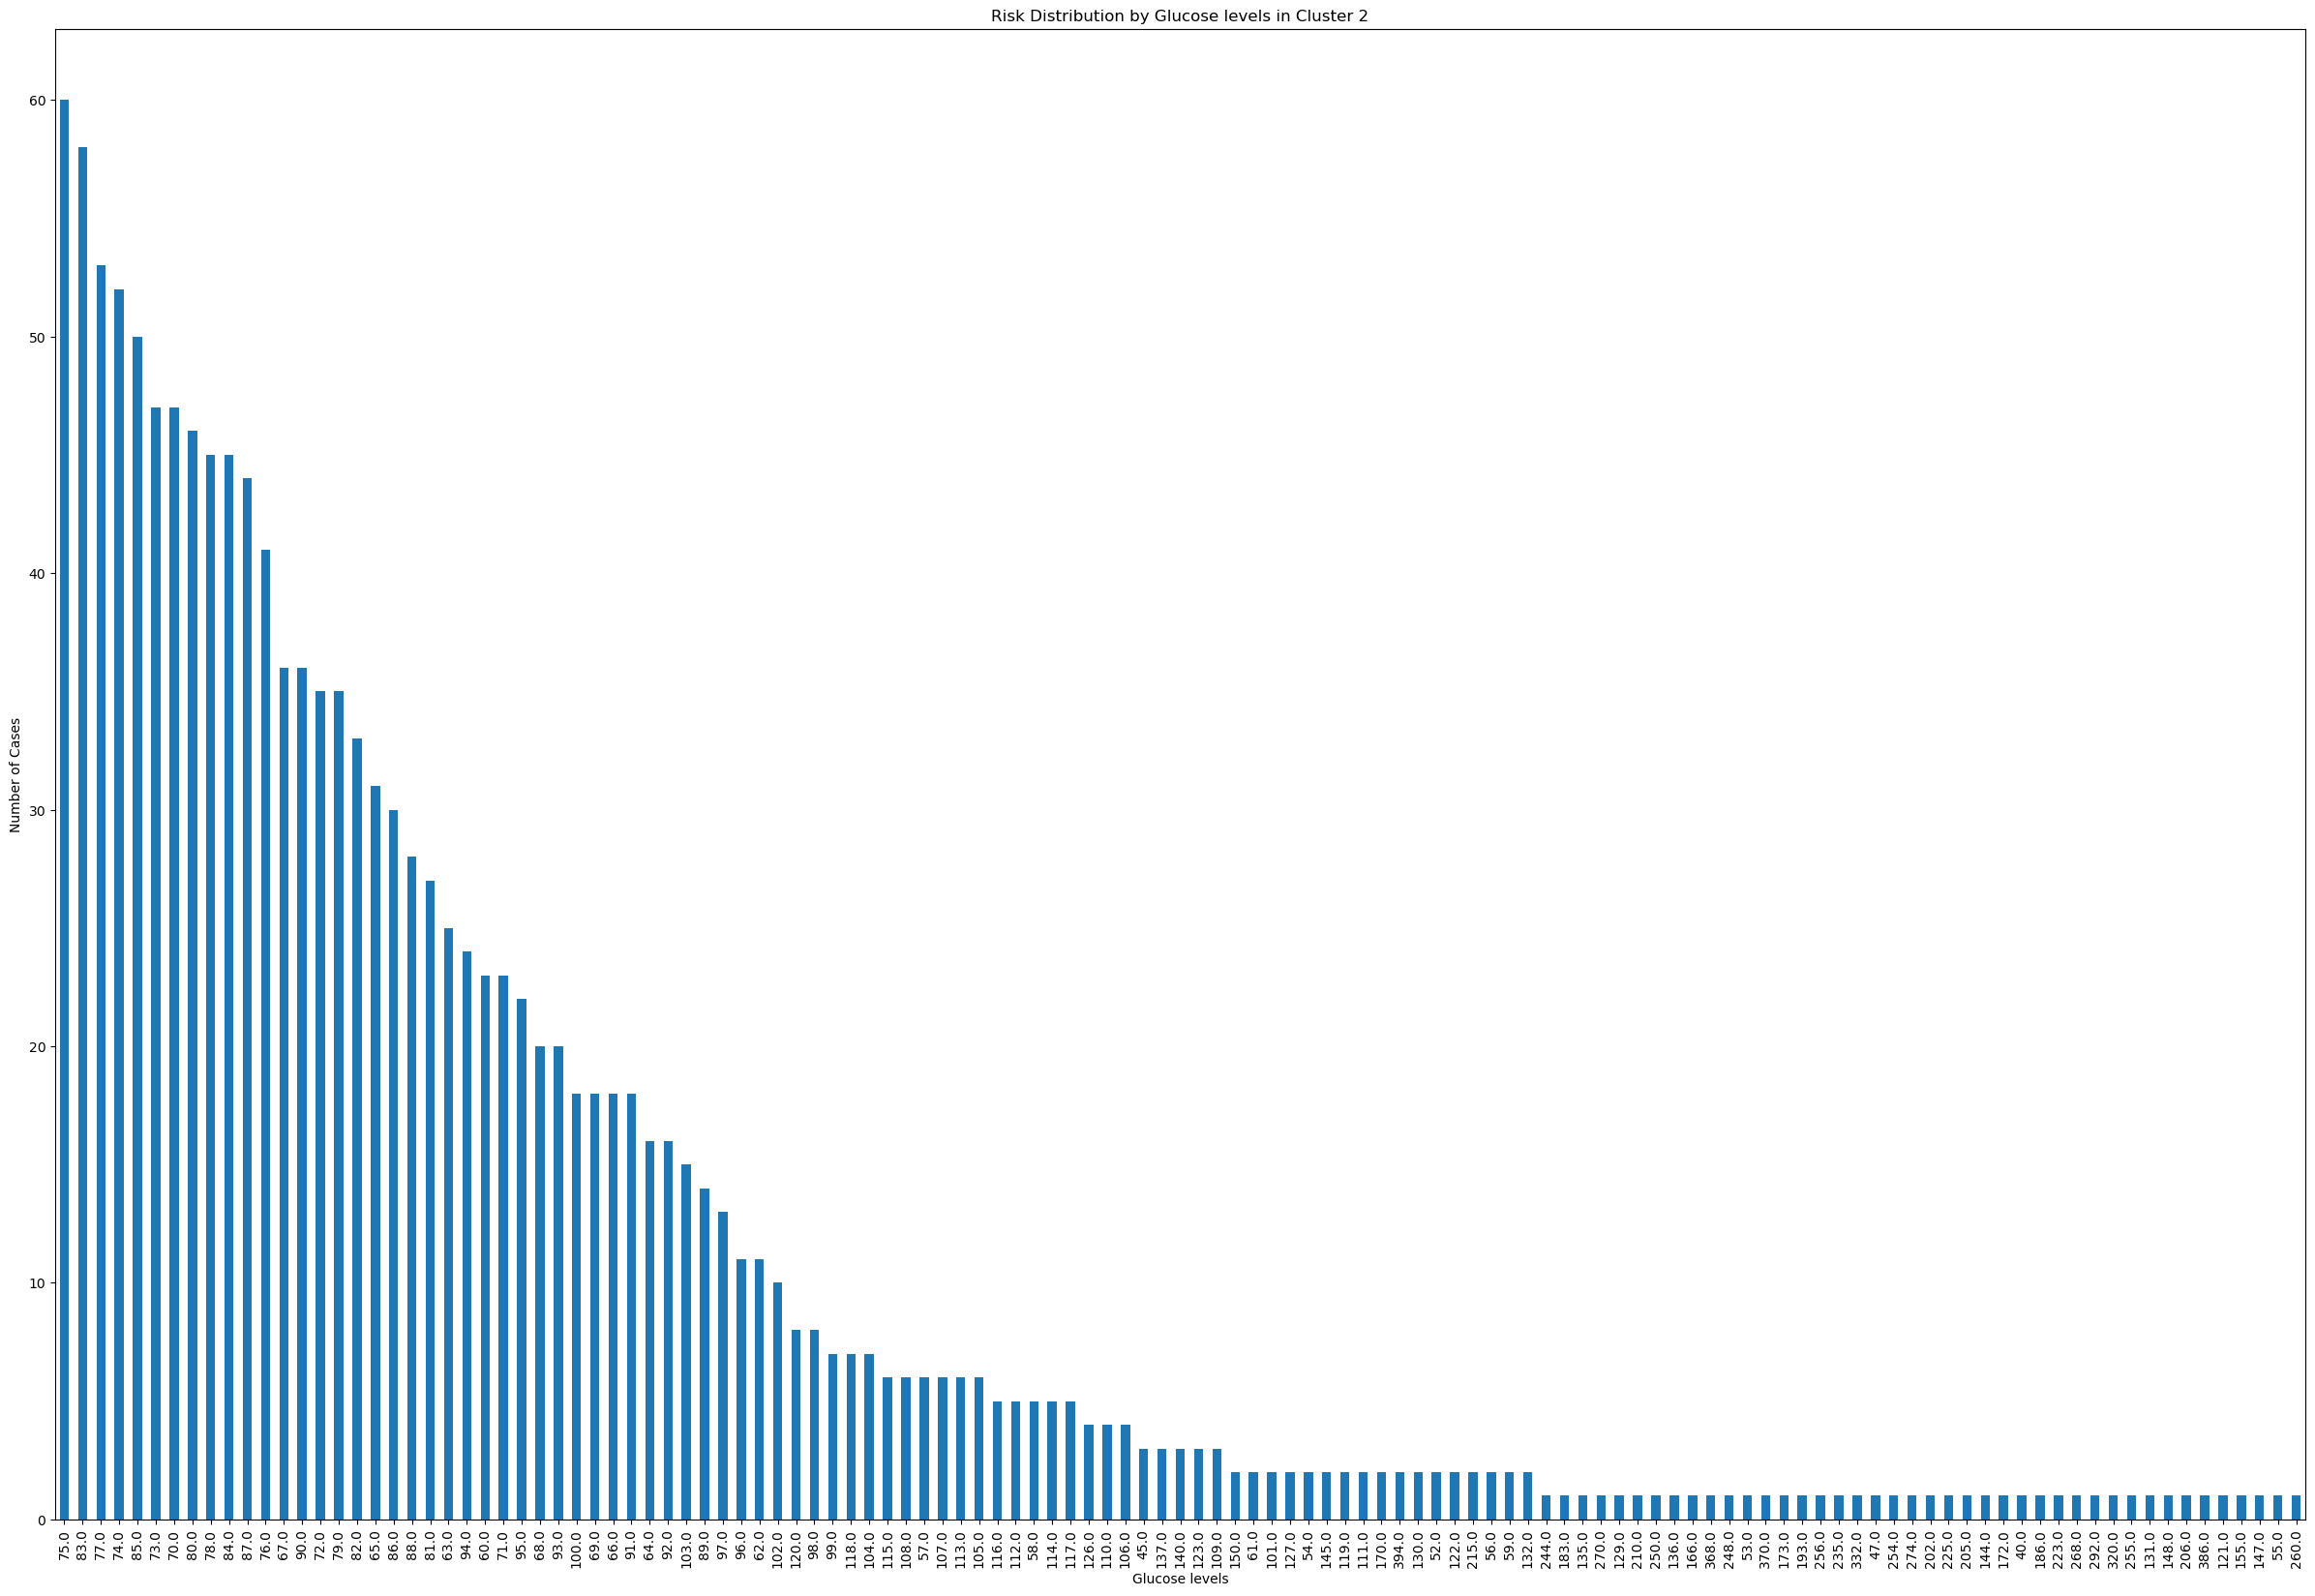

In [117]:
# risk distribution by glucose levels within each cluster(education)
for cluster in range(optimal_k_pca):
    cluster_data = df_new[df_new['Cluster'] == cluster]
    glucose_counts = cluster_data['glucose'].value_counts()
    plt.figure(figsize=(30, 20))
    glucose_counts.plot(kind='bar')
    plt.title(f'Risk Distribution by Glucose levels in Cluster {cluster + 1}')
    plt.xlabel('Glucose levels')
    plt.ylabel('Number of Cases')
    plt.show()

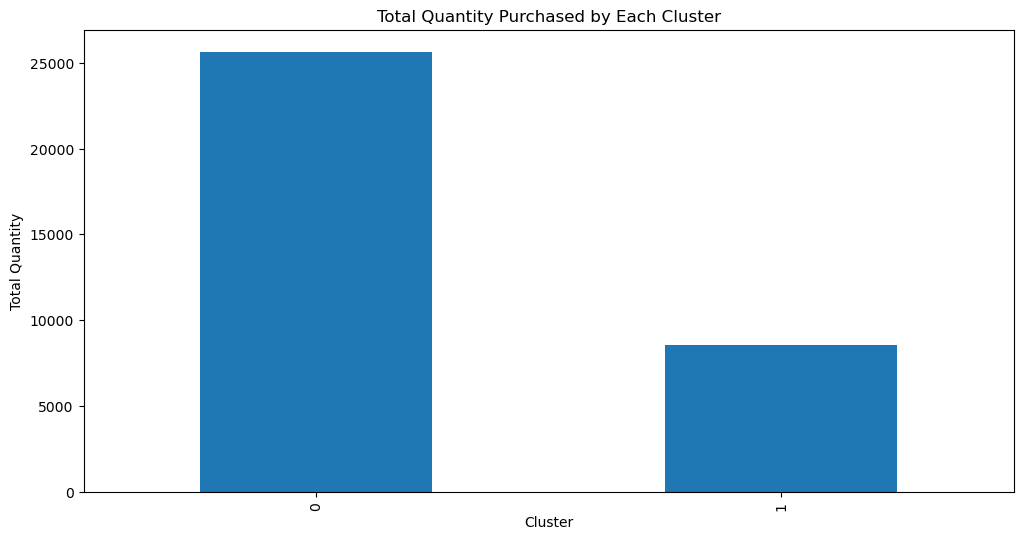

In [126]:
# Order Patterns
# Calculate total quantity of cigs smoked per cluster
total_cigsPerCluster = df_new.groupby('Cluster')['cigsPerDay'].sum()

# Total quantity per cluster
plt.figure(figsize=(12, 6))
total_cigsPerCluster .plot(kind='bar')
plt.title('Total Quantity Purchased by Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Quantity')
plt.show()

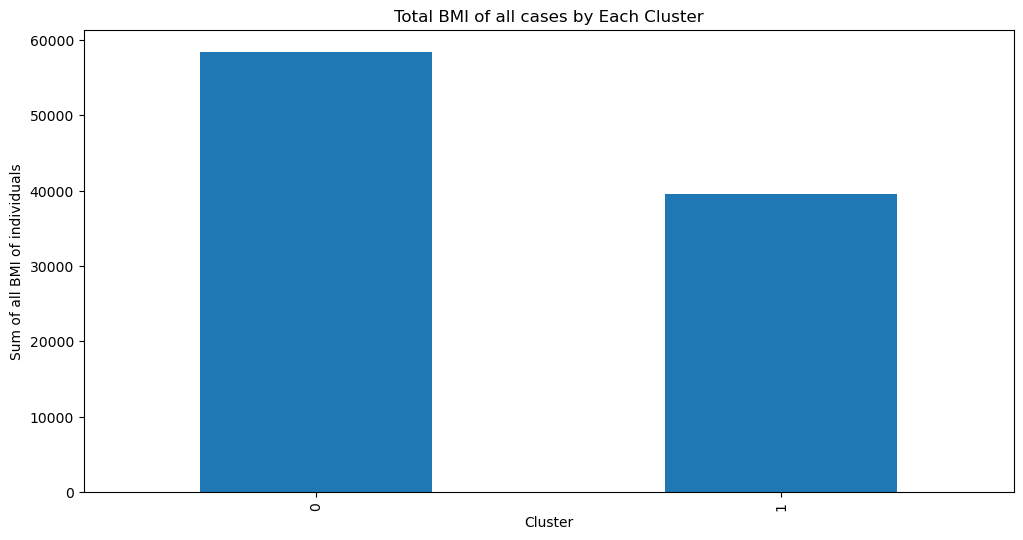

In [129]:
total_BMI_of_all = df_new.groupby('Cluster')['BMI'].sum()

# Total quantity per cluster
plt.figure(figsize=(12, 6))
total_BMI_of_all.plot(kind='bar')
plt.title('Total BMI of all cases by Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sum of all BMI of individuals')
plt.show()

### Interpreting Cluster Characteristics
Cluster 1:
Characteristics:

Residents in this cluster have a moderate to high risk of cardiovacular diseases like hypertension, diabetes and other related complications.
Strategies:

Heathcare outreach: Organize Healthcare outreaches and sensitization programs to educate them on things they can do to reduce their risk.
Personalized Recommendations: Utilize the data to provide personalized recommendations like gym subscriptions, weight loss capsules, low caloric sweeteners etc.
Cluster 2:
Characteristics:

This cluster consists of residents with mostly low to moderate risk.
Strategies:

Promotions: Offer periodic discounts and promotional deals to gym subscriptions and screening exercises.

Strategies:

Targeted Marketing: Use targeted marketing campaigns to re-engage these residents, highlighting the value and benefits of certain products they have shown interest in.
Special Offers: Offer introductory discounts to entice these residents to patronize additional services as well as recommend others to join and partake in services offered.